In [1]:
from bs4 import BeautifulSoup 
import requests 

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
headers = {'User-Agent': 'Mozilla/5.0 (compatible)'}   

resp = requests.get(url, headers=headers, timeout=10)
resp.raise_for_status()   

soup = BeautifulSoup(resp.content, "html.parser")   

In [3]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feat

In [4]:
table = soup.find_all('table', class_ = 'wikitable sortable')[1]

In [5]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [6]:
world_titles = table.find_all('th')

In [7]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [8]:
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [9]:
 world_table_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [10]:
import pandas as pd 

In [11]:
df = pd.DataFrame(columns = world_table_titles)
df

Empty DataFrame
Columns: [Rank, Name, Industry, Revenue (USD millions), Revenue growth, Employees, Headquarters]
Index: []

In [12]:
column_data = table.find_all('tr')
print(column_data)

[<tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>, <tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansas" title="Bentonville, Arkansas">Bentonville, Arkansas</a>
</

In [13]:
for row in column_data[1:]: 
    row_data = row.find_all('td')
    indiv_row_data = [row.text.strip() for row in row_data]

    length = len(df)
    df.loc[length] = indiv_row_data
df

Rank                  Name                    Industry  \
0     1               Walmart                      Retail   
1     2                Amazon  Retail and cloud computing   
2     3                 Apple        Electronics industry   
3     4    UnitedHealth Group                  Healthcare   
4     5    Berkshire Hathaway                Conglomerate   
..  ...                   ...                         ...   
95   96                  TIAA                  Financials   
96   97                   CHS     Agriculture cooperative   
97   98  Bristol-Myers Squibb     Pharmaceutical industry   
98   99  Dow Chemical Company           Chemical industry   
99  100              Best Buy                      Retail   

   Revenue (USD millions) Revenue growth  Employees  \
0                 648,125           6.0%  2,100,000   
1                 574,785          11.9%  1,525,000   
2                 383,482          -2.8%    161,000   
3                 371,622          14.6%    440,000   
4                 364,482          20.7%    396,500   
..                    ...            ...        ...   
95                 45,735          11.8%     16,023   
96                 45,590          -4.6%     10,609   
97                 45,006          -2.5%     34,100   
98                 44,622         -21.6%     35,900   
99                 43,452          -6.1%     85,000   

                      Headquarters  
0            Bentonville, Arkansas  
1              Seattle, Washington  
2            Cupertino, California  
3            Minnetonka, Minnesota  
4                  Omaha, Nebraska  
..                             ...  
95         New York City, New York  
96  Inver Grove Heights, Minnesota  
97         New York City, New York  
98               Midland, Michigan  
99            Richfield, Minnesota  

[100 rows x 7 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [15]:
# Check for duplicates. 
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Rank, Name, Industry, Revenue (USD millions), Revenue growth, Employees, Headquarters]
Index: []


In [16]:

df['Rank'] = df['Rank'].astype('int')


In [17]:
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',','', regex = False)
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype('int')

In [18]:
df['Employees'] = df['Employees'].str.replace(',','', regex = False)
df['Employees'] = df['Employees'].astype('int') 

In [19]:
df['Revenue growth'] = df['Revenue growth'].str.replace('%','', regex = False)
df['Revenue growth'] = df['Revenue growth'].astype('float')
df['Revenue growth'] = df['Revenue growth']/ 100


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int32  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int32  
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int32  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int32(3), object(3)
memory usage: 5.1+ KB


In [21]:
df

Rank                  Name                    Industry  \
0      1               Walmart                      Retail   
1      2                Amazon  Retail and cloud computing   
2      3                 Apple        Electronics industry   
3      4    UnitedHealth Group                  Healthcare   
4      5    Berkshire Hathaway                Conglomerate   
..   ...                   ...                         ...   
95    96                  TIAA                  Financials   
96    97                   CHS     Agriculture cooperative   
97    98  Bristol-Myers Squibb     Pharmaceutical industry   
98    99  Dow Chemical Company           Chemical industry   
99   100              Best Buy                      Retail   

    Revenue (USD millions)  Revenue growth  Employees  \
0                   648125           0.060    2100000   
1                   574785           0.119    1525000   
2                   383482          -0.028     161000   
3                   371622           0.146     440000   
4                   364482           0.207     396500   
..                     ...             ...        ...   
95                   45735           0.118      16023   
96                   45590          -0.046      10609   
97                   45006          -0.025      34100   
98                   44622          -0.216      35900   
99                   43452          -0.061      85000   

                      Headquarters  
0            Bentonville, Arkansas  
1              Seattle, Washington  
2            Cupertino, California  
3            Minnetonka, Minnesota  
4                  Omaha, Nebraska  
..                             ...  
95         New York City, New York  
96  Inver Grove Heights, Minnesota  
97         New York City, New York  
98               Midland, Michigan  
99            Richfield, Minnesota  

[100 rows x 7 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int32  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int32  
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int32  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int32(3), object(3)
memory usage: 5.1+ KB


In [23]:
from pathlib import Path 

data_dir = Path("data") 
data_dir.mkdir(parents = True, exist_ok = True) 

csv_path = data_dir/"largest_companies_us.csv" 

df.to_csv(csv_path, index = False, encoding = "utf-8")

In [24]:
import os
print(os.getcwd())
df = pd.read_csv(csv_path)
df

C:\Users\User


Rank                  Name                    Industry  \
0      1               Walmart                      Retail   
1      2                Amazon  Retail and cloud computing   
2      3                 Apple        Electronics industry   
3      4    UnitedHealth Group                  Healthcare   
4      5    Berkshire Hathaway                Conglomerate   
..   ...                   ...                         ...   
95    96                  TIAA                  Financials   
96    97                   CHS     Agriculture cooperative   
97    98  Bristol-Myers Squibb     Pharmaceutical industry   
98    99  Dow Chemical Company           Chemical industry   
99   100              Best Buy                      Retail   

    Revenue (USD millions)  Revenue growth  Employees  \
0                   648125           0.060    2100000   
1                   574785           0.119    1525000   
2                   383482          -0.028     161000   
3                   371622           0.146     440000   
4                   364482           0.207     396500   
..                     ...             ...        ...   
95                   45735           0.118      16023   
96                   45590          -0.046      10609   
97                   45006          -0.025      34100   
98                   44622          -0.216      35900   
99                   43452          -0.061      85000   

                      Headquarters  
0            Bentonville, Arkansas  
1              Seattle, Washington  
2            Cupertino, California  
3            Minnetonka, Minnesota  
4                  Omaha, Nebraska  
..                             ...  
95         New York City, New York  
96  Inver Grove Heights, Minnesota  
97         New York City, New York  
98               Midland, Michigan  
99            Richfield, Minnesota  

[100 rows x 7 columns]

In [25]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import plotly.express as px 
import pandas as pd
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

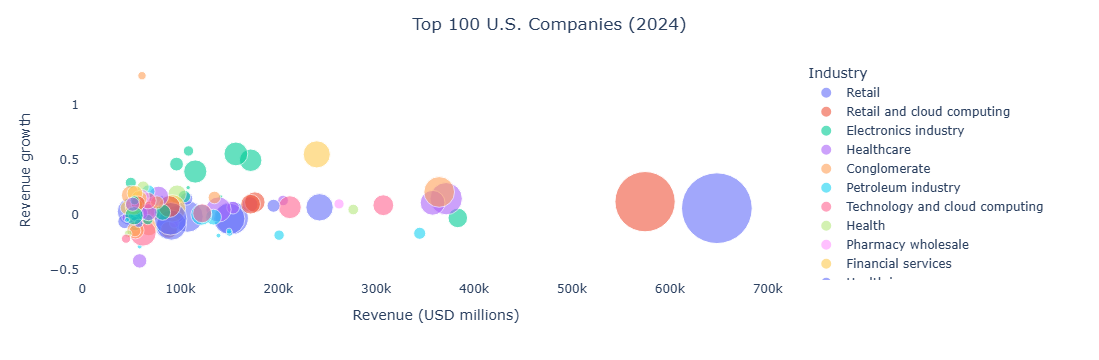

In [26]:
fig1 = px.scatter(
    df, 
    y = 'Revenue growth',
    x = 'Revenue (USD millions)', 
    size = 'Employees', 
    color = 'Industry' ,
    hover_name = 'Name', 
    size_max = 50,
)
fig1.update_traces(marker = dict(opacity = 0.6))
fig1.update_layout(
    plot_bgcolor = 'white',
title = dict(text = "Top 100 U.S. Companies (2024)", x = 0.5))
fig1.show()

In [27]:
df['Headquarters'].value_counts()

Headquarters
New York City, New York    13
Houston, Texas              6
Atlanta, Georgia            4
Austin, Texas               2
Dallas, Texas               2
                           ..
Minneapolis, Minnesota      1
Louisville, Kentucky        1
Bloomington, Illinois       1
Seattle, Washington         1
Richfield, Minnesota        1
Name: count, Length: 71, dtype: int64

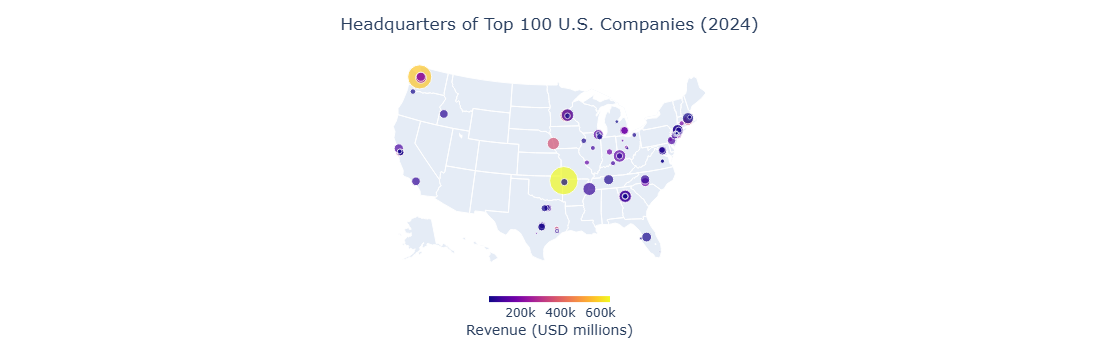

In [28]:
!pip install geopy
from geopy.geocoders import Nominatim # converts text addresses to longitude and latitude
import time #use to pause between requests, so we don't overload the geocoding server 

geolocator = Nominatim(user_agent = 'geoapi') #the user agent is a required string that identifies your application when making a requests

latitudes, longitudes = [], [] #initialize two empty lists 

for place in df['Headquarters']: 
    location = geolocator.geocode(place)
    if location: 
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else: 
        latitudes.append(None)
        longitudes.append(None) 
    time.sleep(1) #waits 1 second between each geocoding requests 
    
df['latitude'] = latitudes 
df['longitude'] = longitudes 

fig2 = px.scatter_geo(
    df, 
    lat = 'latitude', 
    lon= 'longitude', 
    size = 'Employees', 
    color = 'Revenue (USD millions)',
    hover_data = ['Headquarters', 'Revenue (USD millions)', 'Employees', 'Name'],
    projection = 'albers usa'
) 

fig2.update_layout(
    title =dict(text = 'Headquarters of Top 100 U.S. Companies (2024)', x = 0.5),
    coloraxis_colorbar = dict(orientation = 'h',yanchor = 'bottom', y = -0.4, x = 0.5, thickness = 6, len = 0.15, title = dict(text = 'Revenue (USD millions)', side = 'bottom')),
    geo_scope = 'usa', 
    geo = dict(projection_scale = 1)
) 

fig2.show()

In [29]:
df_revenuegrowth_sorted = df.sort_values("Revenue growth").reset_index(drop = True)
df_revenuegrowth_sorted

df_revenue_sorted = df.sort_values("Revenue (USD millions)").reset_index(drop = True)
df_revenue_sorted

# min, max, (revenue growth) 

min_revenuegrowth = df.loc[df['Revenue growth'].idxmin(),'Name']
max_revenuegrowth = df.loc[df['Revenue growth'].idxmax(),'Name']

#min, max (revenue) 
min_revenue = df.loc[df['Revenue (USD millions)'].idxmin(),'Name']
max_revenue = df.loc[df['Revenue (USD millions)'].idxmax(),'Name']


tick_labels = [min_revenuegrowth, max_revenuegrowth, min_revenue, max_revenue] 
print(tick_labels)

['Pfizer', 'Nvidia', 'Best Buy', 'Walmart']


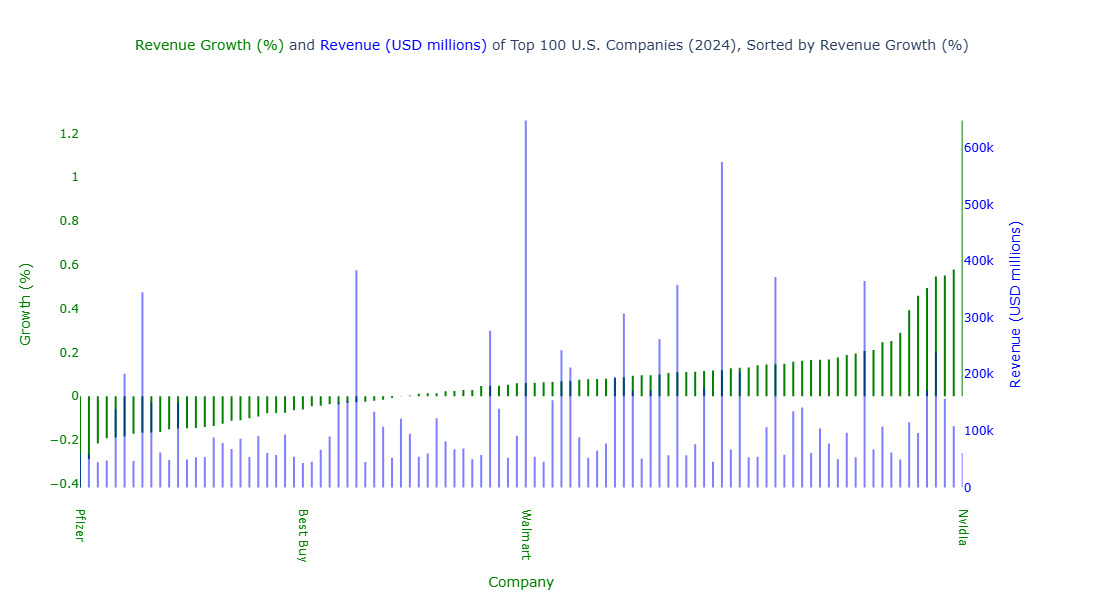

In [30]:
fig3 = make_subplots(specs = [[{"secondary_y":True}]])

for i,row in df_revenuegrowth_sorted.iterrows():
    fig3.add_trace(go.Scatter(
    x = [row['Name'], row['Name']], 
    y = [0, row['Revenue growth']], 
    mode = 'lines', 
    line = dict(color = 'green'),
    showlegend = False ), 
        
    secondary_y = False )

for i, row in df_revenue_sorted.iterrows():
    fig3.add_trace(go.Scatter(
    x = [row['Name'], row['Name']], 
    y = [0, row['Revenue (USD millions)']],
    mode = 'lines', 
    line = dict(color = 'blue'),
    opacity = 0.5,
    showlegend = False ),
    
    secondary_y = True
)

tick_indices = [df_revenuegrowth_sorted[df_revenuegrowth_sorted['Name'] == label].index[0] for label in tick_labels] 

fig3.update_layout(
    plot_bgcolor = 'white',
    title = dict(
        text = ( "<span style = 'color: green' > Revenue Growth (%) </span style>" "and" "<span style = 'color: blue'> Revenue (USD millions)</span style>" 
                " of Top 100 U.S. Companies (2024), Sorted by Revenue Growth (%)"), 
        x = 0.5, 
    font =dict(size = 14)),
    width = 900, 
    height = 600, 
    xaxis = dict(title = "Company", tickvals = tick_indices,tickangle = 90, color = 'green'),
    yaxis = dict(title = "Growth (%)",color = 'green'), 
    yaxis2 = dict(title = "Revenue (USD millions)",color = 'blue')
)

fig3.show()

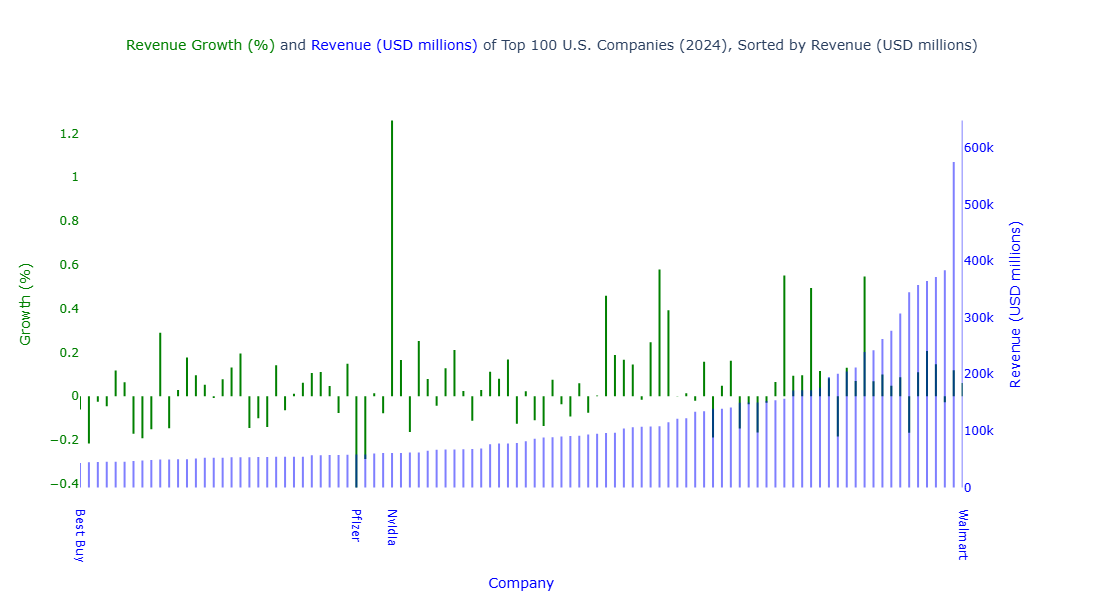

In [31]:
fig4 = make_subplots(specs = [[{"secondary_y":True}]])

for i, row in df_revenue_sorted.iterrows():
    fig4.add_trace(go.Scatter(
    x = [row['Name'], row['Name']], 
    y = [0, row['Revenue (USD millions)']],
    mode = 'lines', 
    line = dict(color = 'blue'),
    opacity = 0.5,
    showlegend = False ),
    
    secondary_y = True
)
    
for i,row in df_revenuegrowth_sorted.iterrows():
    fig4.add_trace(go.Scatter(
    x = [row['Name'], row['Name']], 
    y = [0, row['Revenue growth']], 
    mode = 'lines', 
    line = dict(color = 'green'),
    showlegend = False), 
        
    secondary_y = False )
    
tick_indices = [df_revenue_sorted[df_revenue_sorted['Name'] == label].index[0] for label in tick_labels] 

fig4.update_layout(
    plot_bgcolor = 'white',
    title = dict(
        text = ( "<span style = 'color: green' > Revenue Growth (%) </span style>" "and" "<span style = 'color: blue'> Revenue (USD millions)</span style>" 
                " of Top 100 U.S. Companies (2024), Sorted by Revenue (USD millions)"), 
        x = 0.5, 
    font =dict(size = 14)),
    width = 900, 
    height = 600, 
    xaxis = dict(title = "Company", tickvals = tick_indices, ticktext = tick_labels,tickangle = 90, color = 'blue'),
    yaxis = dict(title = "Growth (%)",color = 'green'), 
    yaxis2 = dict(title = "Revenue (USD millions)",color = 'blue')
)

fig4.show()

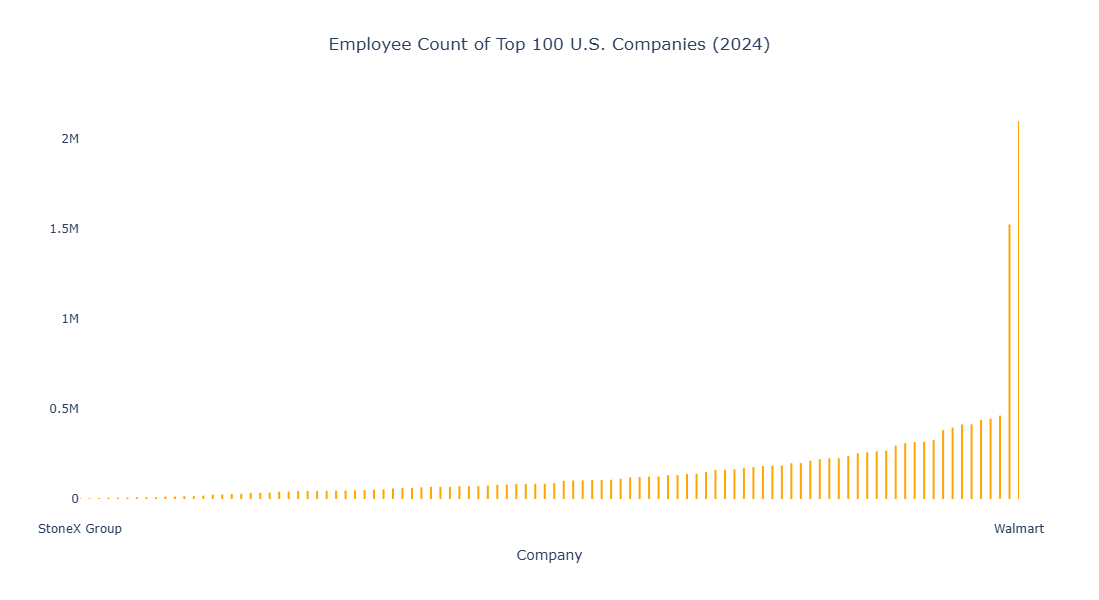

In [32]:
df_employee_sorted = df.sort_values('Employees').reset_index(drop = True)

fig5 = make_subplots()

for i, row in df_employee_sorted.iterrows():
    fig5.add_trace(go.Scatter(
    x = [row['Name'], row['Name']], 
    y = [0, row['Employees']], 
    mode = 'lines', 
    line = dict(color = 'orange'), 
    showlegend = False))

fig5.update_layout(
    plot_bgcolor = 'white', 
    title = dict(text = 'Employee Count of Top 100 U.S. Companies (2024)', x = 0.5), 
    width = 900, 
    height = 600, 
    xaxis = dict(title = 'Company', tickvals = [0, 99]), 
)

fig5.show()

In [33]:
df['Revenue growth'].corr(df['Employees'])

df['Revenue (USD millions)'].corr(df['Employees'])

df['Revenue (USD millions)'].corr(df['Employees'], method = 'spearman')

df['Revenue (USD millions)'].corr(df['Employees'], method = 'kendall')

0.28860145513338725

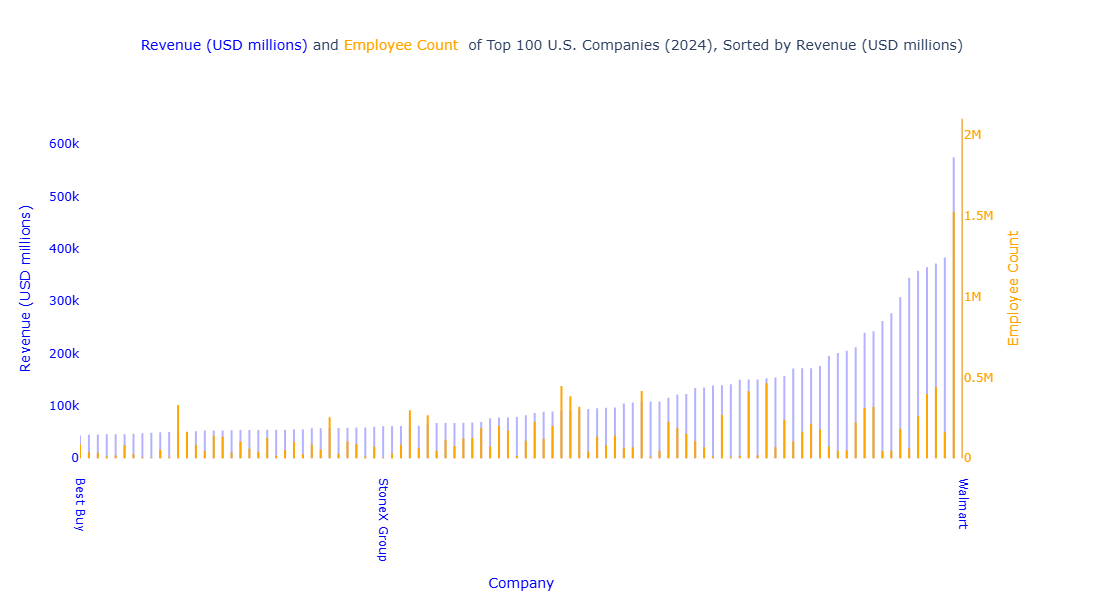

In [34]:
min_employee = df.loc[df['Employees'].idxmin(),'Name']
max_employee = df.loc[df['Employees'].idxmax(),'Name']

fig6_tick_labels = [min_employee, max_employee, min_revenue, max_revenue]

fig6 = make_subplots(specs = [[{"secondary_y":True}]])

for i, row in df_revenue_sorted.iterrows():
    fig6.add_trace(go.Scatter(
    x = [row['Name'], row['Name']], 
    y = [0, row['Revenue (USD millions)']],
    mode = 'lines', 
    line = dict(color = 'blue'),
    opacity = 0.3,
    showlegend = False ),
    
    secondary_y = False
)
    
for i,row in df_employee_sorted.iterrows():
    fig6.add_trace(go.Scatter(
    x = [row['Name'], row['Name']], 
    y = [0, row['Employees']], 
    mode = 'lines', 
    line = dict(color = 'orange'),
    showlegend = False), 
        
    secondary_y = True )
    
tick_indices = [df_revenue_sorted[df_revenue_sorted['Name'] == label].index[0] for label in fig6_tick_labels] 

fig6.update_layout(
    plot_bgcolor = 'white',
    title = dict(
        text = ( "<span style = 'color: blue' > Revenue (USD millions) </span style>" "and" "<span style = 'color: orange'> Employee Count </span style>" 
                " of Top 100 U.S. Companies (2024), Sorted by Revenue (USD millions)"), 
        x = 0.5, 
    font =dict(size = 14)),
    width = 900, 
    height = 600, 
    xaxis = dict(title = "Company", tickvals = tick_indices,tickangle = 90, color = 'blue'),
    yaxis2 = dict(title = "Employee Count",color = 'orange'), 
    yaxis = dict(title = "Revenue (USD millions)",color = 'blue')
)

fig6.show()

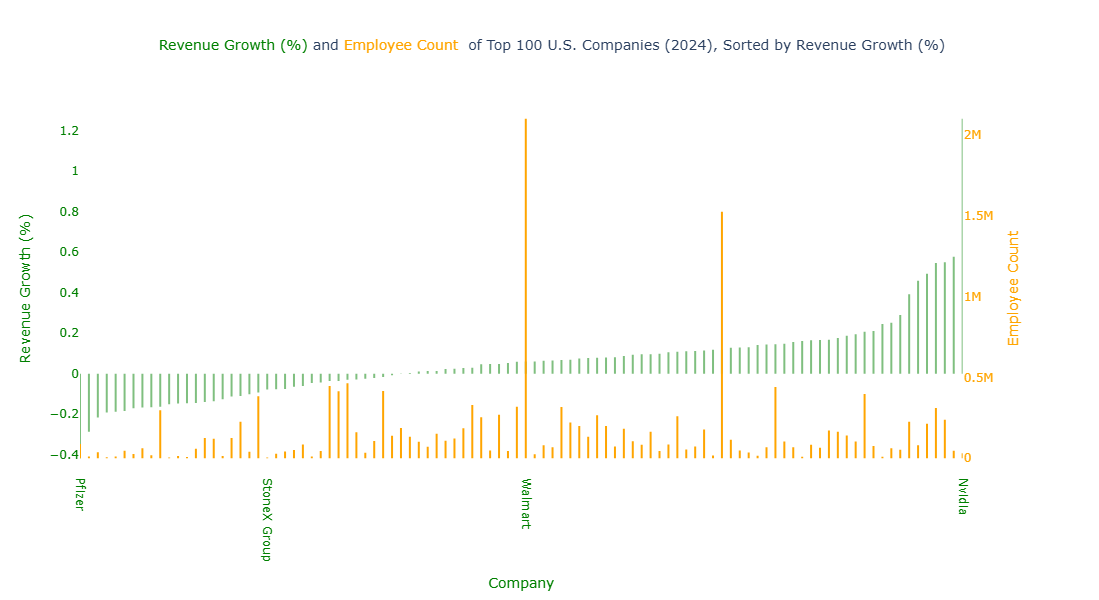

In [35]:
fig7_tick_labels = [min_employee, max_employee, min_revenuegrowth, max_revenuegrowth]

fig7 = make_subplots(specs = [[{"secondary_y":True}]])

for i, row in df_revenuegrowth_sorted.iterrows():
    fig7.add_trace(go.Scatter(
    x = [row['Name'], row['Name']], 
    y = [0, row['Revenue growth']],
    mode = 'lines', 
    line = dict(color = 'green'),
    opacity = 0.5,
    showlegend = False ),
    
    secondary_y = False
)
    
for i,row in df_employee_sorted.iterrows():
    fig7.add_trace(go.Scatter(
    x = [row['Name'], row['Name']], 
    y = [0, row['Employees']], 
    mode = 'lines', 
    line = dict(color = 'orange'),
    showlegend = False), 
        
    secondary_y = True )
    
tick_indices = [df_revenuegrowth_sorted[df_revenuegrowth_sorted['Name'] == label].index[0] for label in fig7_tick_labels] 

fig7.update_layout(
    plot_bgcolor = 'white',
    title = dict(
        text = ( "<span style = 'color: green' > Revenue Growth (%) </span style>" "and" "<span style = 'color: orange'> Employee Count </span style>" 
                " of Top 100 U.S. Companies (2024), Sorted by Revenue Growth (%)"), 
        x = 0.5, 
    font =dict(size = 14)),
    width = 900, 
    height = 600, 
    xaxis = dict(title = "Company", tickvals = tick_indices,tickangle = 90, color = 'green'),
    yaxis2 = dict(title = "Employee Count",color = 'orange'), 
    yaxis = dict(title = "Revenue Growth (%)",color = 'green')
)

fig7.show()

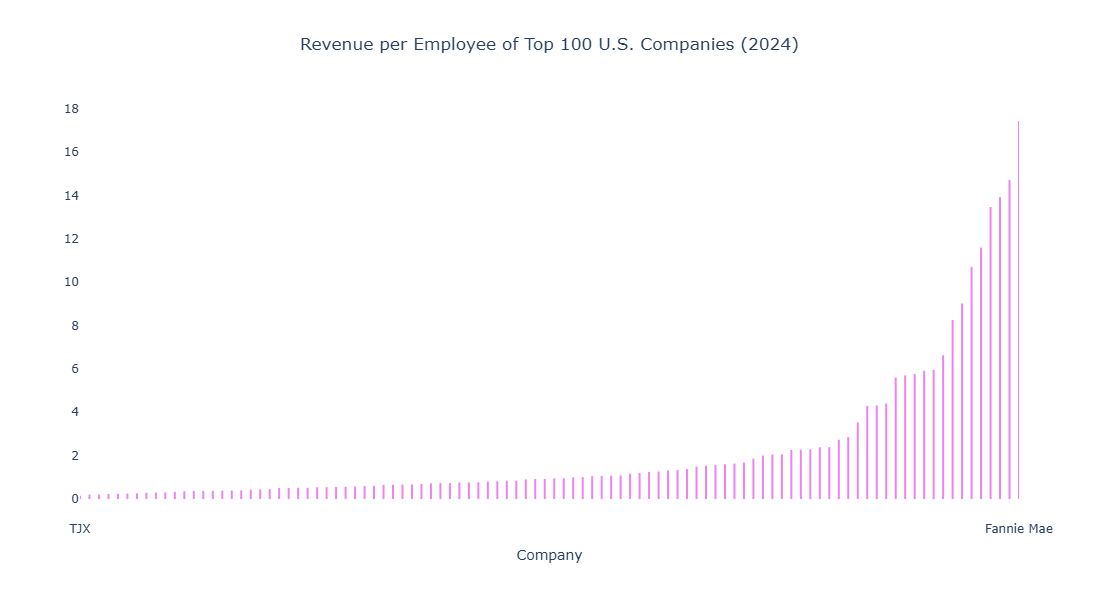

In [36]:
df['Revenue per Employee'] = df['Revenue (USD millions)']/ df['Employees']
df_revenue_per_employee_sorted = df.sort_values('Revenue per Employee').reset_index(drop = True)

fig8 = make_subplots()

for i, row in df_revenue_per_employee_sorted.iterrows():
    fig8.add_trace(go.Scatter(
    x = [row['Name'], row['Name']], 
    y = [0, row['Revenue per Employee']], 
    mode = 'lines', 
    line = dict(color = 'violet'), 
    showlegend = False))

fig8.update_layout(
    plot_bgcolor = 'white', 
    title = dict(text = 'Revenue per Employee of Top 100 U.S. Companies (2024)', x = 0.5), 
    width = 900, 
    height = 600, 
    xaxis = dict(title = 'Company', tickvals = [0,99]), 
)

fig8.show()

In [37]:
df['Industry'].value_counts()

Industry
Financials                             13
Retail                                 10
Petroleum industry                      9
Pharmaceutical industry                 6
Technology                              6
Healthcare                              6
Insurance                               5
Telecommunications                      3
Airline                                 3
Technology and cloud computing          3
Conglomerate                            3
Food processing                         2
Beverage                                2
Automotive industry                     2
Financial                               2
Aerospace and defense                   2
Transportation                          2
Health insurance                        2
Agriculture manufacturing               1
Agriculture cooperative                 1
Information Technology                  1
Telecom hardware manufacturing          1
Apparel                                 1
Energy trading           

In [38]:
df['Industry'].replace('Financial', 'Financials', inplace = True) 
df['Industry'].replace('Financial services', 'Financials', inplace = True)
df['Industry'].replace('Health', 'Healthcare', inplace = True)
df['Industry'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_15132\2175257752.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\User\AppData\Local\Temp\ipykernel_15132\2175257752.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Industry
Financials                             16
Retail                                 10
Petroleum industry                      9
Healthcare                              7
Pharmaceutical industry                 6
Technology                              6
Insurance                               5
Conglomerate                            3
Technology and cloud computing          3
Airline                                 3
Telecommunications                      3
Transportation                          2
Food processing                         2
Aerospace and defense                   2
Beverage                                2
Health insurance                        2
Automotive industry                     2
Agriculture manufacturing               1
Agriculture cooperative                 1
Energy trading                          1
Apparel                                 1
Electronics industry                    1
Telecom hardware manufacturing          1
Information Technology   

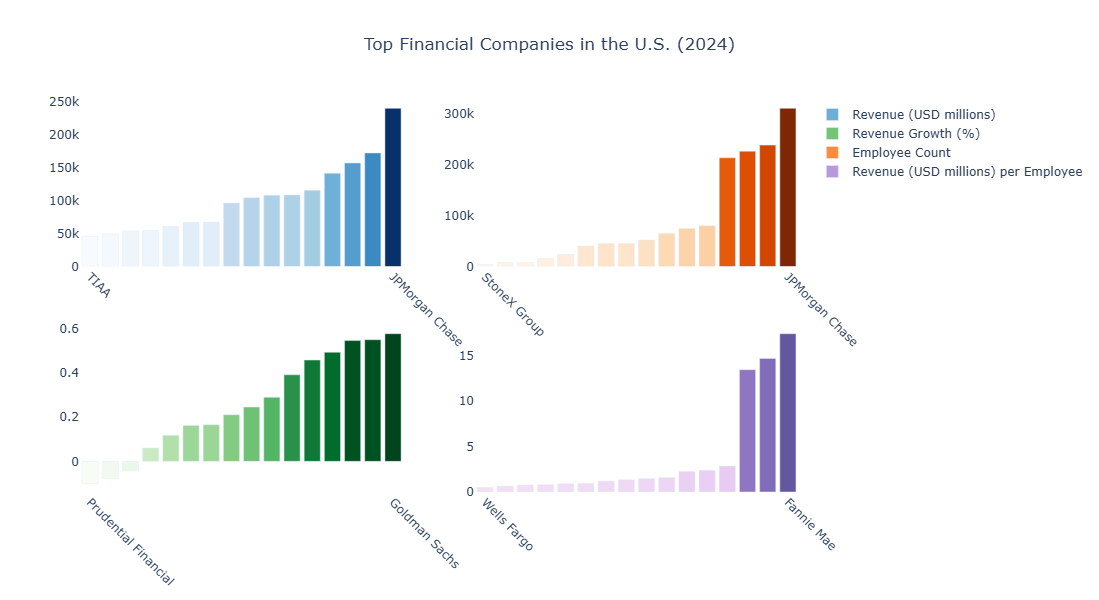

In [39]:
fig9 = make_subplots(
    rows = 2, cols = 2,
)

#graph 1
df_financials_revenue = df[df['Industry'] == 'Financials'].sort_values('Revenue (USD millions)').reset_index(drop = True)
                                                                      
fig9.add_trace(go.Bar(
    x = df_financials_revenue['Name'], 
    y = df_financials_revenue['Revenue (USD millions)'],
    name = 'Revenue (USD millions)', 
    marker = dict(color = df_financials_revenue['Revenue (USD millions)'], colorscale = 'Blues')), 
    row = 1, col = 1)
               
fig9.update_xaxes(
    tickvals =[df_financials_revenue.index[0], df_financials_revenue.index[-1]],tickangle =45, row =1, col =1)

#graph 2
df_financials_growth = df[df['Industry'] == 'Financials'].sort_values('Revenue growth').reset_index(drop = True)

fig9.add_trace(go.Bar(
    x = df_financials_growth['Name'], 
    y = df_financials_growth['Revenue growth'], 
    name = 'Revenue Growth (%)', 
    marker = dict(color = df_financials_growth['Revenue growth'], colorscale = 'Greens' )
), 
    row = 2, col = 1)

fig9.update_xaxes(
    tickvals =[df_financials_growth.index[0], df_financials_growth.index[-1]],tickangle = 45, row =2, col =1)

#graph 3

df_financials_employee = df[df['Industry'] == 'Financials'].sort_values('Employees').reset_index(drop = True)

fig9.add_trace(go.Bar(
    x = df_financials_employee['Name'], 
    y = df_financials_employee['Employees'], 
    name = 'Employee Count', 
    marker = dict(color = df_financials_employee['Employees'], colorscale = 'Oranges' )
), 
    row = 1, col = 2)


fig9.update_xaxes(
    tickvals =[df_financials_employee.index[0], df_financials_employee.index[-1]],tickangle = 45, row =1, col =2)

#graph 4

df_financials_employeerev = df[df['Industry'] == 'Financials'].sort_values('Revenue per Employee').reset_index(drop = True)

fig9.add_trace(go.Bar(
    x = df_financials_employeerev['Name'], 
    y = df_financials_employeerev['Revenue per Employee'], 
    name = 'Revenue (USD millions) per Employee', 
    marker = dict(color = df_financials_employeerev['Revenue per Employee'], colorscale = 'purp' )
), 
    row = 2, col = 2)


fig9.update_xaxes(
    tickvals =[df_financials_employeerev.index[0], df_financials_employeerev.index[-1]],tickangle = 45, row =2, col =2)

fig9.update_layout(
    plot_bgcolor = 'white', 
    title = dict(
         text = ("Top Financial Companies in the U.S. (2024)"), x = 0.5),  
    height = 600,
    width = 900
)

fig9.show()


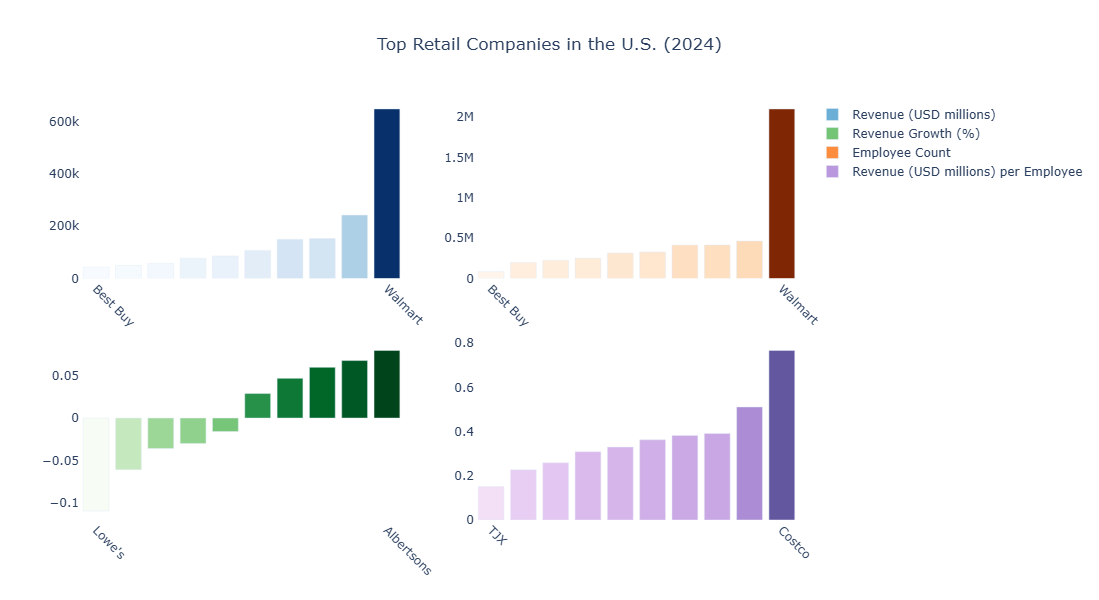

In [40]:
fig10 = make_subplots(
    rows = 2, cols = 2,
)

#graph 1

df_retail_revenue = df[df['Industry'] == 'Retail'].sort_values('Revenue (USD millions)').reset_index(drop = True)
                                                                      
fig10.add_trace(go.Bar(
    x = df_retail_revenue['Name'], 
    y = df_retail_revenue['Revenue (USD millions)'],
    name = 'Revenue (USD millions)', 
    marker = dict(color = df_retail_revenue['Revenue (USD millions)'], colorscale = 'Blues')), 
    row = 1, col = 1)
               
fig10.update_xaxes(
    tickvals =[df_retail_revenue.index[0], df_retail_revenue.index[-1]],tickangle =45, row =1, col =1)

#graph 2

df_retail_growth = df[df['Industry'] == 'Retail'].sort_values('Revenue growth').reset_index(drop = True)

fig10.add_trace(go.Bar(
    x = df_retail_growth['Name'], 
    y = df_retail_growth['Revenue growth'], 
    name = 'Revenue Growth (%)', 
    marker = dict(color = df_retail_growth['Revenue growth'], colorscale = 'Greens' )
), 
    row = 2, col = 1)

fig10.update_xaxes(
    tickvals =[df_retail_growth.index[0], df_retail_growth.index[-1]],tickangle = 45, row =2, col =1)

#graph 3

df_retail_employee = df[df['Industry'] == 'Retail'].sort_values('Employees').reset_index(drop = True)

fig10.add_trace(go.Bar(
    x = df_retail_employee['Name'], 
    y = df_retail_employee['Employees'], 
    name = 'Employee Count', 
    marker = dict(color = df_retail_employee['Employees'], colorscale = 'Oranges' )
), 
    row = 1, col = 2)


fig10.update_xaxes(
    tickvals =[df_retail_employee.index[0], df_retail_employee.index[-1]],tickangle = 45, row =1, col =2)

#graph 4

df_retail_employeerev = df[df['Industry'] == 'Retail'].sort_values('Revenue per Employee').reset_index(drop = True)

fig10.add_trace(go.Bar(
    x = df_retail_employeerev['Name'], 
    y = df_retail_employeerev['Revenue per Employee'], 
    name = 'Revenue (USD millions) per Employee', 
    marker = dict(color = df_retail_employeerev['Revenue per Employee'], colorscale = 'purp' )
), 
    row = 2, col = 2)


fig10.update_xaxes(
    tickvals =[df_retail_employeerev.index[0], df_retail_employeerev.index[-1]],tickangle = 45, row =2, col =2)


fig10.update_layout(
    plot_bgcolor = 'white', 
    title = dict(
         text = ( "Top Retail Companies in the U.S. (2024)"), x = 0.5),  
    height = 600,
    width = 900
)

fig10.show()


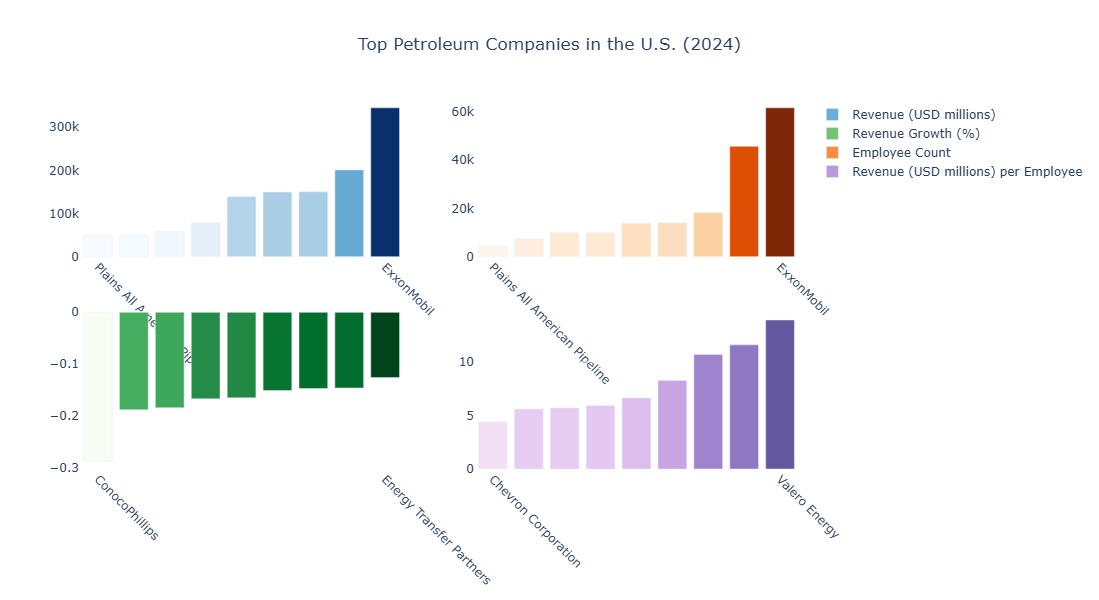

In [41]:
fig11 = make_subplots(
    rows = 2, cols = 2,
)

#graph 1

df_petroleum_revenue = df[df['Industry'] == 'Petroleum industry'].sort_values('Revenue (USD millions)').reset_index(drop = True)
                                                                      
fig11.add_trace(go.Bar(
    x = df_petroleum_revenue['Name'], 
    y = df_petroleum_revenue['Revenue (USD millions)'],
    name = 'Revenue (USD millions)', 
    marker = dict(color = df_petroleum_revenue['Revenue (USD millions)'], colorscale = 'Blues')), 
    row = 1, col = 1)
               
fig11.update_xaxes(
    tickvals =[df_petroleum_revenue.index[0], df_petroleum_revenue.index[-1]], tickangle = 45, row =1, col =1)

#graph 2

df_petroleum_growth = df[df['Industry'] == 'Petroleum industry'].sort_values('Revenue growth').reset_index(drop = True)

fig11.add_trace(go.Bar(
    x = df_petroleum_growth['Name'], 
    y = df_petroleum_growth['Revenue growth'], 
    name = 'Revenue Growth (%)', 
    marker = dict(color = df_petroleum_growth['Revenue growth'], colorscale = 'Greens' )
), 
    row = 2, col = 1)

fig11.update_xaxes(
    tickvals =[df_petroleum_growth.index[0], df_petroleum_growth.index[-1]],tickangle = 45,row =2, col =1)
#graph 3

df_petroleum_employee = df[df['Industry'] == 'Petroleum industry'].sort_values('Employees').reset_index(drop = True)

fig11.add_trace(go.Bar(
    x = df_petroleum_employee['Name'], 
    y = df_petroleum_employee['Employees'], 
    name = 'Employee Count', 
    marker = dict(color = df_petroleum_employee['Employees'], colorscale = 'Oranges' )
), 
    row = 1, col = 2)


fig11.update_xaxes(
    tickvals =[df_petroleum_employee.index[0], df_petroleum_employee.index[-1]],tickangle = 45, row =1, col =2)

#graph 4

df_petroleum_employeerev = df[df['Industry'] == 'Petroleum industry'].sort_values('Revenue per Employee').reset_index(drop = True)

fig11.add_trace(go.Bar(
    x = df_petroleum_employeerev['Name'], 
    y = df_petroleum_employeerev['Revenue per Employee'], 
    name = 'Revenue (USD millions) per Employee', 
    marker = dict(color = df_petroleum_employeerev['Revenue per Employee'], colorscale = 'purp' )
), 
    row = 2, col = 2)


fig11.update_xaxes(
    tickvals =[df_petroleum_employeerev.index[0], df_petroleum_employeerev.index[-1]],tickangle = 45, row =2, col =2)

fig11.update_layout(
    plot_bgcolor = 'white', 
    title = dict(
         text = ( "Top Petroleum Companies in the U.S. (2024)"), x = 0.5),  
    height = 600,
    width = 900
)

fig11.show()


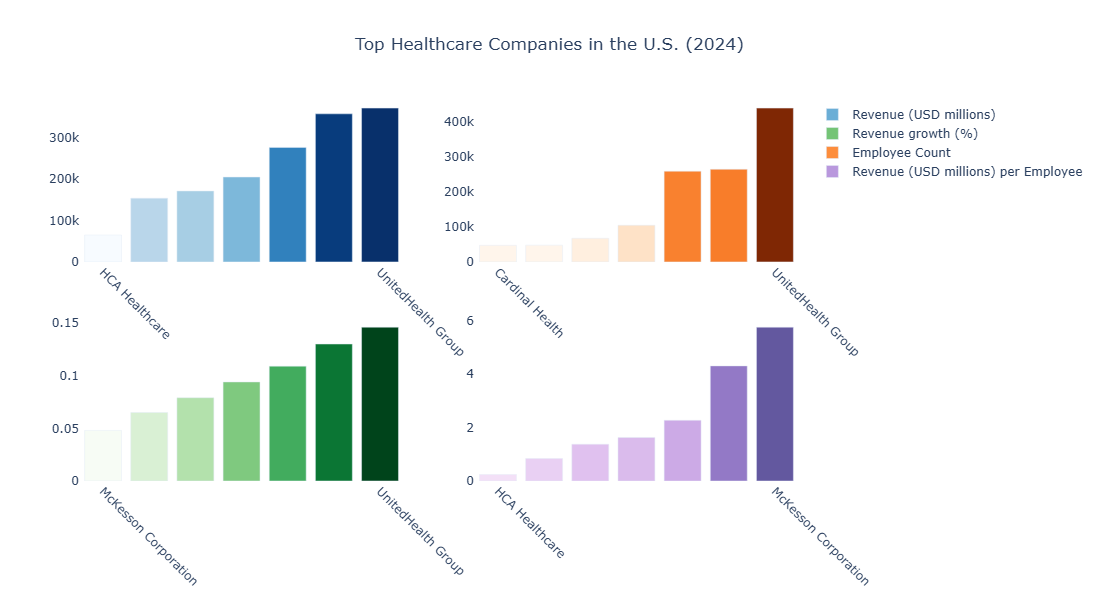

In [42]:
fig12 = make_subplots(
    rows = 2, cols = 2,
)

#graph 1

df_healthcare_revenue = df[df['Industry'] == 'Healthcare'].sort_values('Revenue (USD millions)').reset_index(drop = True)
                                                                      
fig12.add_trace(go.Bar(
    x = df_healthcare_revenue['Name'], 
    y = df_healthcare_revenue['Revenue (USD millions)'],
    name = 'Revenue (USD millions)', 
    marker = dict(color = df_healthcare_revenue['Revenue (USD millions)'], colorscale = 'Blues')), 
    row = 1, col = 1)
               
fig12.update_xaxes(
    tickvals =[df_healthcare_revenue.index[0], df_healthcare_revenue.index[-1]],tickangle = 45, row =1, col =1)

#graph 2

df_healthcare_growth = df[df['Industry'] == 'Healthcare'].sort_values('Revenue growth').reset_index(drop = True)

fig12.add_trace(go.Bar(
    x = df_healthcare_growth['Name'], 
    y = df_healthcare_growth['Revenue growth'], 
    name = 'Revenue growth (%)', 
    marker = dict(color = df_healthcare_growth['Revenue growth'], colorscale = 'Greens' )
), 
    row = 2, col = 1)

fig12.update_xaxes(
    tickvals =[df_healthcare_growth.index[0], df_healthcare_growth.index[-1]],tickangle = 45, row =2, col =1)

#graph 3

df_healthcare_employee = df[df['Industry'] == 'Healthcare'].sort_values('Employees').reset_index(drop = True)

fig12.add_trace(go.Bar(
    x = df_healthcare_employee['Name'], 
    y = df_healthcare_employee['Employees'], 
    name = 'Employee Count', 
    marker = dict(color = df_healthcare_employee['Employees'], colorscale = 'Oranges' )
), 
    row = 1, col = 2)


fig12.update_xaxes(
    tickvals =[df_healthcare_employee.index[0], df_healthcare_employee.index[-1]],tickangle = 45, row =1, col =2)

#graph 4

df_healthcare_employeerev = df[df['Industry'] == 'Healthcare'].sort_values('Revenue per Employee').reset_index(drop = True)

fig12.add_trace(go.Bar(
    x = df_healthcare_employeerev['Name'], 
    y = df_healthcare_employeerev['Revenue per Employee'], 
    name = 'Revenue (USD millions) per Employee', 
    marker = dict(color = df_healthcare_employeerev['Revenue per Employee'], colorscale = 'purp' )
), 
    row = 2, col = 2)

fig12.update_xaxes(
    tickvals =[df_healthcare_employeerev.index[0], df_healthcare_employeerev.index[-1]],tickangle = 45, row =2, col =2)

fig12.update_layout(
    plot_bgcolor = 'white', 
    title = dict(
         text = ( "Top Healthcare Companies in the U.S. (2024)"), x = 0.5),  
    height = 600,
    width = 900
)

fig12.show()


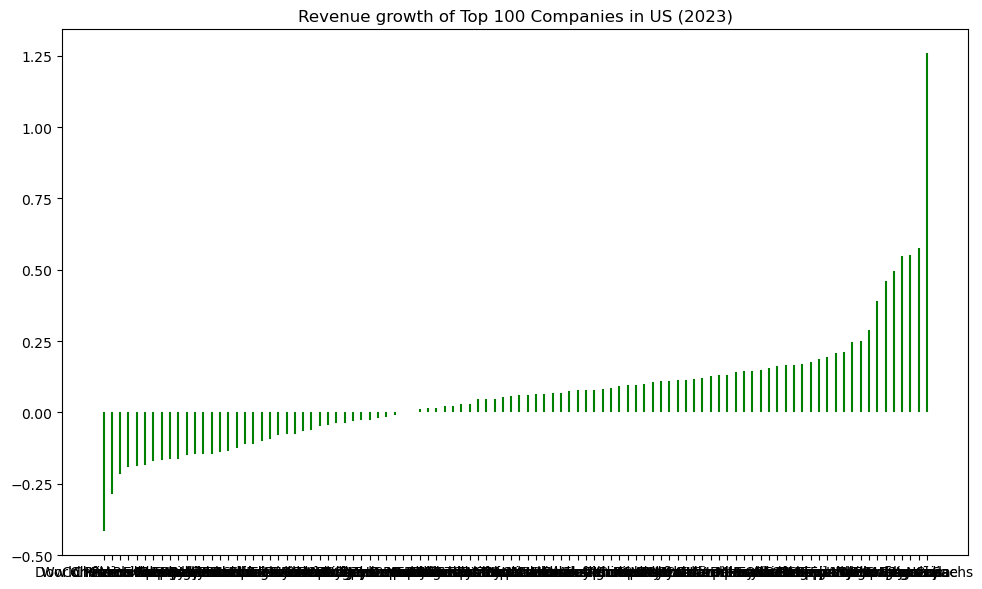

In [43]:
fig, ax1= plt.subplots(figsize = (10,6))
ax1.vlines(x = df_revenuegrowth_sorted["Name"], ymin = 0, ymax = df_revenuegrowth_sorted["Revenue growth"], color = "green", label = "Revenue (USD M)")

ax1.set_title("Revenue growth of Top 100 Companies in US (2023)")
plt.tight_layout()
plt.show()

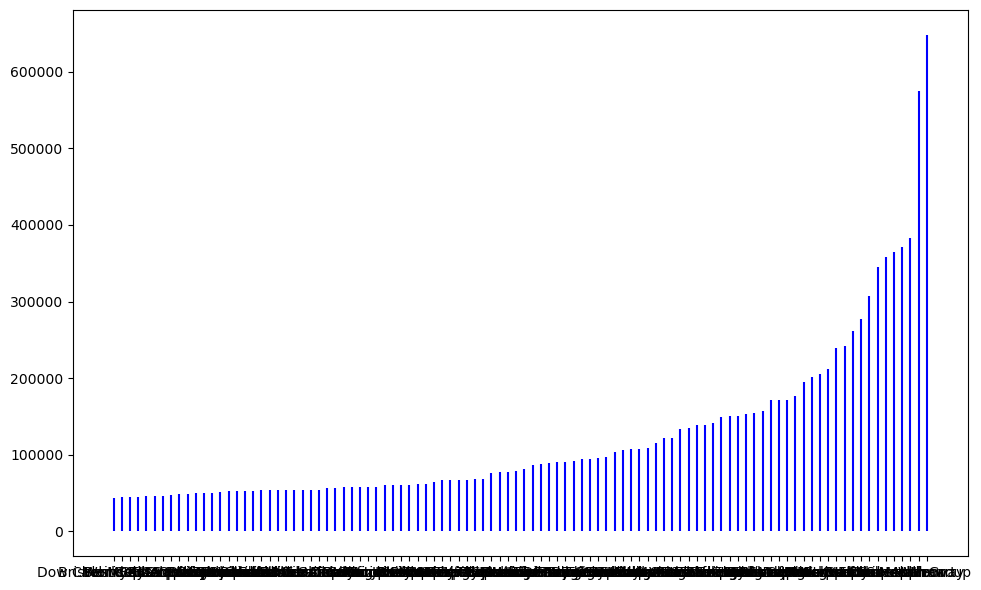

In [44]:
fig, ax2 = plt.subplots(figsize = (10,6))
ax2.vlines(x = df_revenue_sorted["Name"], ymin = 0, ymax = df_revenue_sorted["Revenue (USD millions)"], color = "blue", label = "Revenue (USD M)")

plt.tight_layout()
plt.show()


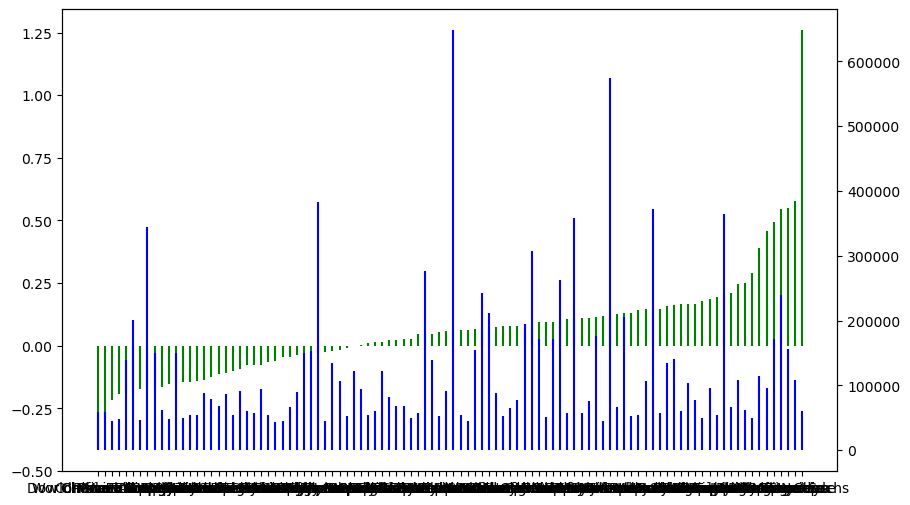

In [45]:
fig, ax1_ = plt.subplots(figsize = (10,6))
ax1_.vlines( x = df_revenuegrowth_sorted["Name"], ymin = 0, ymax = df_revenuegrowth_sorted["Revenue growth"], color = "green",label = "Revenue growth")

ax2_ = ax1_.twinx()
ax2_.vlines(x = df_revenue_sorted["Name"], ymin = 0, ymax = df_revenue_sorted["Revenue (USD millions)"], color = "blue", label = "Revenue (USD M)")

plt.show()